In [1]:
# importing the necessary pandas package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# importing the datetime package to convert it to the necessary date
from datetime import datetime

In [2]:
df_original = pd.read_csv("sample.csv")

In [3]:
def df_parser(blood_df, clean=True):
    # PARAMETERS: `blood_df`[dataframe] -> input dataframe; `clean`[bool] -> remove the NaN values from the data
    
    # FUNCTIONALITY: takes an input dataframe and reformats it for better visualization
    
    # RETURNS: a dataframe with columns 
    #`date`[datetime64[ns]] -> Date of the measurment
    #`sys`[float64] -> Systolic pressure
    #`dia`[float64] -> Diastolic pressure
    #`diff`[float64] -> Systolic minus Diastolic pressure
    #`div`[float64] -> Systolic divided by Diastolic pressure
    
    # initialize all the lists used to create the dataframe
    date_list = []
    sys_list = []
    dia_list = []
    diff_list = []
    div_list = []
    
    # the time values corresponding to each column
    hour_values = ["9:00AM", "1:00PM", "8:00PM"]
    
    # for loop to create the date_list, sys_list, and dia_list
    for i, row in blood_df.iterrows():
        for hour_values_index in range(len(hour_values)):
            # filling date_list with datetime objects
            time_str = row[0] + " 2022" + " " + hour_values[hour_values_index]
            date_list += [datetime.strptime(time_str, '%b %d %Y %I:%M%p')]
            # making the blood pressure measurments into a string for easy parsing
            pressure_str = str(row[hour_values_index+1])
            # function for parsing the blood pressure strings into seperate lists
            if "/" in pressure_str:
                sys_list += [int(pressure_str[:pressure_str.index('/')])]
                dia_list += [int(pressure_str[pressure_str.index('/')+1:])]
            else:
                sys_list += [np.nan]
                dia_list += [np.nan]
    
    # loop to create more lists of data
    for list_index in range(len(date_list)):
        diff_list += [sys_list[list_index] - dia_list[list_index]]
        div_list += [sys_list[list_index] / dia_list[list_index]]
        
    # make a new dataframe with the updated values and column names
    dict = {'date':date_list,
            'sys':sys_list,
            'dia':dia_list, 
            'diff': diff_list,
            'div': div_list}
    
    df = pd.DataFrame(dict)
    
    print(df.dtypes)
    
    # if the clean parameter is 
    if clean:
        return df.dropna()
    else:
        return df

In [4]:
df = df_parser(df_original)

date    datetime64[ns]
sys            float64
dia            float64
diff           float64
div            float64
dtype: object


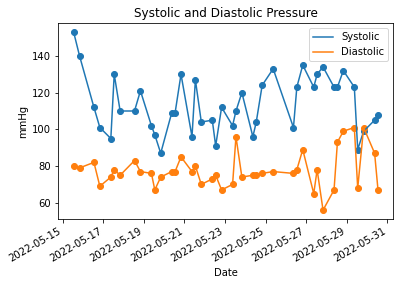

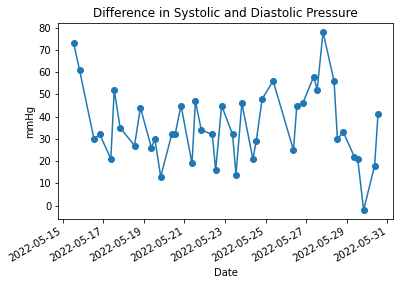

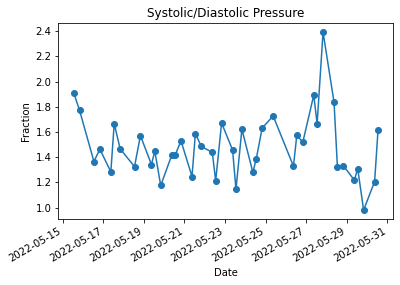

In [5]:
# ----- #
plt.scatter(df['date'], df['sys'])
plt.plot(df['date'], df['sys'], label = 'Systolic')
plt.scatter(df['date'], df['dia'])
plt.plot(df['date'], df['dia'], label = 'Diastolic')
plt.gcf().autofmt_xdate()

plt.legend(loc="upper right")

plt.title('Systolic and Diastolic Pressure')
plt.xlabel('Date')
plt.ylabel('mmHg')

plt.savefig('SysDia.png', dpi = 150)

plt.show()

# ----- #
plt.scatter(df['date'], df['diff'])
plt.plot(df['date'], df['diff'])
plt.gcf().autofmt_xdate()

plt.title('Difference in Systolic and Diastolic Pressure')
plt.xlabel('Date')
plt.ylabel('mmHg')

plt.savefig('SysminusDia.png', dpi = 150)

plt.show()

# ----- #
plt.scatter(df['date'], df['div'])
plt.plot(df['date'], df['div'])
plt.gcf().autofmt_xdate()

plt.title('Systolic/Diastolic Pressure')
plt.xlabel('Date')
plt.ylabel('Fraction')

plt.savefig('SysdivDia.png', dpi = 150)

plt.show()

In [6]:
df.dtypes

date    datetime64[ns]
sys            float64
dia            float64
diff           float64
div            float64
dtype: object